This file is part of BrainMolecularAtlas.

Copyright (c) 2021-2022 Blue Brain Project/EPFL 

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.
This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import pandas as pd
import numpy as np

import xlrd
import xlsxwriter

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_colwidth = 250
pd.set_option("display.max_columns",100)

In [2]:
# rtpf is from Gene-specific correlation of RNA and protein levels in human cells and tissues. Edfors et al 2016 inline-supplementary-material-8.xls
rtpf = pd.ExcelFile('../data/inline-supplementary-material-8.xlsx')
rtp = rtpf.parse('Sheet2')

# proteome: cell-type specific neuron-astrocyte Sharma et al 2015
proteome1prot_f = pd.ExcelFile('../data/nn.4160-S7.xlsx')
proteome1prot = proteome1prot_f.parse('Sheet1')
proteome1rna_f = pd.ExcelFile('../data/nn.4160-S5.xlsx')
proteome1rna = proteome1rna_f.parse('Sheet2')

proteome1rna = proteome1rna.rename(columns={'GeneName':'Gene names'})

sharma = pd.merge(proteome1prot, proteome1rna, on='Gene names',how='inner')

print(len(proteome1prot['Gene names']))
print(len(proteome1prot['Gene names'].unique()))
print(len(proteome1rna['Gene names']))
print(len(proteome1rna['Gene names'].unique()))
print(len(sharma))
print(len(sharma['Gene names'].unique()))

sharma[sharma['Gene names'].duplicated(keep=False)].head()

print(len(sharma['Majority protein IDs']))
print(len(sharma['Majority protein IDs'].unique()))

sharma = sharma.drop_duplicates(['Majority protein IDs'], keep='first')

print(len(sharma['Majority protein IDs']))
print(len(sharma['Majority protein IDs'].unique()))

10888
10261
19501
19499
9818
9410
9818
9816
9816
9816


In [3]:
sharma['Gene names'] =sharma['Gene names'].str.upper()

sharma = sharma.reset_index(drop=True)

In [4]:
# iBAQ = sum intensity/#theoretical peptides 

iniCountsPepA = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersaaCSV.txt", sep = '\t')
iniCountsPepB = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersabCSV.txt", sep = '\t')
iniCountsPepC = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersacCSV.txt", sep = '\t')
iniCountsPepD = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersadCSV.txt", sep = '\t')
iniCountsPepE = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersaeCSV.txt", sep = '\t')
iniCountsPepF = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersafCSV.txt", sep = '\t')
iniCountsPepG = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersagCSV.txt", sep = '\t')
iniCountsPepH = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersahCSV.txt", sep = '\t')
iniCountsPepI = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersaiCSV.txt", sep = '\t')
iniCountsPepJ = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersajCSV.txt", sep = '\t')
iniCountsPepK = pd.read_csv("/Users/polina/Documents/BBP_project/METABOLISM/2018_Polina_model/Polina_model/11_molAtlas_Proteins/trypsinedPeptidesNumbersakCSV.txt", sep = '\t')

iniCountsPep = pd.concat([iniCountsPepA,iniCountsPepB,iniCountsPepC,iniCountsPepD,iniCountsPepE,iniCountsPepF,iniCountsPepG,iniCountsPepJ,iniCountsPepK])

iniCountsPepD = iniCountsPep.set_index('Uniprot').T.to_dict('list')

sharma['MedPepCount'] = 0
for i,uniprotid in enumerate(sharma['Majority protein IDs']):
    uids = uniprotid.split(';')
    counts = []
    for uid in uids:
        if uid in iniCountsPepD:
            
            counts.append(iniCountsPepD.get(uid)[0])
    sharma.loc[i,'MedPepCount'] = np.nanmedian(counts)
    
    
# from Proteomic ruler plugin of Perseus and Wisniewski et al. 2014 paper
tcp = 200 
papc = 200 
avogadro = 6.02214129e23
basePairWeight = 615.8771
musMusculusHistoneIdsPerseus = ["Q9DAD9", "B2RTM0", "Q8CBB6", "Q921L4", "Q5M8Q2", "Q810S6", "B1AV31", "Q497L1", "A9Z055", "Q8CGP9", "P10922",
"Q8CJI4", "E0CZ52", "E0CYL2", "Q8VIK3", "Q80ZM5", "Q9CQ70", "Q8R1M2", "Q3THW5", "Q8R029", "B2RVP5", "P27661",
"Q9QZQ8", "Q8CA90", "Q8BP16", "Q9CTR1", "Q8CCK0", "Q9D3V6", "Q9D3U7", "Q3UA95", "Q3TFU6", "G3UWL7", "G3UX40",
"P0C0S6", "F8WI35", "E0CZ27", "E0CYN1", "E0CYR7", "P84244", "P02301", "Q9QYL0", "P43275", "P43276", "P15864",
"Q5SZA3", "P43277", "Q149Z9", "P43274", "Q07133", "I7HFT9", "Q8CGP4", "P22752", "B2RVF0", "Q61668", "Q8CGP5",
"A0AUV1", "Q8CGP6", "A3KPD0", "Q8CGP7", "F8WIX8", "A0JNS9", "P70696", "Q64475", "Q6ZWY9", "P10853", "Q64478",
"A0JLV3", "Q8CGP1", "B2RVD5", "P10854", "B2RTK3", "Q8CGP2", "P68433", "P84228", "A1L0U3", "A1L0V4", "P62806",
"B2RWH3", "Q6GSS7", "Q64522", "Q64523", "Q149V4", "Q64525", "G3X9D5", "Q64524", "B9EI85", "Q61667", "Q8BFU2",
"A2AB79", "Q9D2U9", "Q8CGP0", "Q6B822", "P07978", "Q9D9Z7"]

mouse_genomeSize = 2.7*10**9
#c value: http://en.wikipedia.org/wiki/C-value
cValue_mouse = mouse_genomeSize*basePairWeight/avogadro

# worked with 
sharma = sharma.loc[sharma['MedPepCount']>0] # its fine as only 2 proteins out of ~9000 has it ==0
sharma['detectabilityNormFactor'] = sharma['MedPepCount']

mwWeightedNormalizedSummedIntensities_Astrocyte1 = np.sum(sharma['LFQ intensity Astrocytes 1']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_Astrocyte2 = np.sum(sharma['LFQ intensity Astrocytes 2']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_Astrocyte3 = np.sum(sharma['LFQ intensity Astrocytes 3']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))

mwWeightedNormalizedSummedIntensities_AdultMicroglia1 = np.sum(sharma['LFQ intensity adult Microglia 1']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_AdultMicroglia2 = np.sum(sharma['LFQ intensity adult Microglia 2']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_AdultMicroglia3 = np.sum(sharma['LFQ intensity adult Microglia 3']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))

mwWeightedNormalizedSummedIntensities_Oligodendrocytesdiv1_1 = np.sum(sharma['LFQ intensity Oligodendrocytes div1                    1']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_Oligodendrocytesdiv1_2 = np.sum(sharma['LFQ intensity Oligodendrocytes div1                    2']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_Oligodendrocytesdiv1_3 = np.sum(sharma['LFQ intensity Oligodendrocytes div1                    3']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))



mwWeightedNormalizedSummedIntensities_Neurondiv05_1 = np.sum(sharma['LFQ intensity Neurons div05                  1']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_Neurondiv05_2 = np.sum(sharma['LFQ intensity Neurons div05                  2']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_Neurondiv05_3 = np.sum(sharma['LFQ intensity Neurons div05                  3']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))

mwWeightedNormalizedSummedIntensities_Neurondiv10_1 = np.sum(sharma['LFQ intensity Neurons div10                  1']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_Neurondiv10_2 = np.sum(sharma['LFQ intensity Neurons div10                  2']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))
mwWeightedNormalizedSummedIntensities_Neurondiv10_3 = np.sum(sharma['LFQ intensity Neurons div10                  3']/sharma['detectabilityNormFactor']*(sharma['Mol. weight [kDa]']*1000))



factor_Astrocyte1 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Astrocyte1
factor_Astrocyte2 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Astrocyte2
factor_Astrocyte3 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Astrocyte3

factor_AdultMicroglia1 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_AdultMicroglia1
factor_AdultMicroglia2 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_AdultMicroglia2
factor_AdultMicroglia3 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_AdultMicroglia3

factor_Oligodendrocytesdiv1_1 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Oligodendrocytesdiv1_1
factor_Oligodendrocytesdiv1_2 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Oligodendrocytesdiv1_2
factor_Oligodendrocytesdiv1_3 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Oligodendrocytesdiv1_3



factor_Neurondiv05_1 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Neurondiv05_1
factor_Neurondiv05_2 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Neurondiv05_2
factor_Neurondiv05_3 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Neurondiv05_3

factor_Neurondiv10_1 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Neurondiv10_1
factor_Neurondiv10_2 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Neurondiv10_2
factor_Neurondiv10_3 = papc*1e-12*avogadro/mwWeightedNormalizedSummedIntensities_Neurondiv10_3




sharma['CopyNumCalc Astrocytes 1'] = sharma['LFQ intensity Astrocytes 1']/sharma['detectabilityNormFactor']*factor_Astrocyte1
sharma['CopyNumCalc Astrocytes 2'] = sharma['LFQ intensity Astrocytes 2']/sharma['detectabilityNormFactor']*factor_Astrocyte2
sharma['CopyNumCalc Astrocytes 3'] = sharma['LFQ intensity Astrocytes 3']/sharma['detectabilityNormFactor']*factor_Astrocyte3

sharma['CopyNumCalc AdultMicroglia 1'] = sharma['LFQ intensity adult Microglia 1']/sharma['detectabilityNormFactor']*factor_AdultMicroglia1
sharma['CopyNumCalc AdultMicroglia 2'] = sharma['LFQ intensity adult Microglia 2']/sharma['detectabilityNormFactor']*factor_AdultMicroglia2
sharma['CopyNumCalc AdultMicroglia 3'] = sharma['LFQ intensity adult Microglia 3']/sharma['detectabilityNormFactor']*factor_AdultMicroglia3

sharma['CopyNumCalc Oligodendrocytesdiv1 1'] = sharma['LFQ intensity Oligodendrocytes div1                    1']/sharma['detectabilityNormFactor']*factor_Oligodendrocytesdiv1_1
sharma['CopyNumCalc Oligodendrocytesdiv1 2'] = sharma['LFQ intensity Oligodendrocytes div1                    2']/sharma['detectabilityNormFactor']*factor_Oligodendrocytesdiv1_2
sharma['CopyNumCalc Oligodendrocytesdiv1 3'] = sharma['LFQ intensity Oligodendrocytes div1                    3']/sharma['detectabilityNormFactor']*factor_Oligodendrocytesdiv1_3


sharma['CopyNumCalc Neurons div05 1'] = sharma['LFQ intensity Neurons div05                  1']/sharma['detectabilityNormFactor']*factor_Neurondiv05_1
sharma['CopyNumCalc Neurons div05 2'] = sharma['LFQ intensity Neurons div05                  2']/sharma['detectabilityNormFactor']*factor_Neurondiv05_2
sharma['CopyNumCalc Neurons div05 3'] = sharma['LFQ intensity Neurons div05                  3']/sharma['detectabilityNormFactor']*factor_Neurondiv05_3

sharma['CopyNumCalc Neurons div10 1'] = sharma['LFQ intensity Neurons div10                  1']/sharma['detectabilityNormFactor']*factor_Neurondiv10_1
sharma['CopyNumCalc Neurons div10 2'] = sharma['LFQ intensity Neurons div10                  2']/sharma['detectabilityNormFactor']*factor_Neurondiv10_2
sharma['CopyNumCalc Neurons div10 3'] = sharma['LFQ intensity Neurons div10                  3']/sharma['detectabilityNormFactor']*factor_Neurondiv10_3

totalProtein_Astrocyte1 = np.sum(sharma['CopyNumCalc Astrocytes 1']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro) # *1000 because of kDa to Da
totalVolume_Astrocyte1 = totalProtein_Astrocyte1/tcp*1000 # femtoliters

totalProtein_Astrocyte2 = np.sum(sharma['CopyNumCalc Astrocytes 2']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Astrocyte2 = totalProtein_Astrocyte2/tcp*1000 # femtoliters

totalProtein_Astrocyte3 = np.sum(sharma['CopyNumCalc Astrocytes 3']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Astrocyte3 = totalProtein_Astrocyte3/tcp*1000 # femtoliters



totalProtein_AdultMicroglia1 = np.sum(sharma['CopyNumCalc AdultMicroglia 1']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_AdultMicroglia1 = totalProtein_AdultMicroglia1/tcp*1000 # femtoliters

totalProtein_AdultMicroglia2 = np.sum(sharma['CopyNumCalc AdultMicroglia 2']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_AdultMicroglia2 = totalProtein_AdultMicroglia2/tcp*1000 # femtoliters

totalProtein_AdultMicroglia3 = np.sum(sharma['CopyNumCalc AdultMicroglia 3']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_AdultMicroglia3 = totalProtein_AdultMicroglia3/tcp*1000 # femtoliters



totalProtein_Oligodendrocytesdiv1_1 = np.sum(sharma['CopyNumCalc Oligodendrocytesdiv1 1']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Oligodendrocytesdiv1_1 = totalProtein_Oligodendrocytesdiv1_1/tcp*1000 # femtoliters

totalProtein_Oligodendrocytesdiv1_2 = np.sum(sharma['CopyNumCalc Oligodendrocytesdiv1 2']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Oligodendrocytesdiv1_2 = totalProtein_Oligodendrocytesdiv1_2/tcp*1000 # femtoliters

totalProtein_Oligodendrocytesdiv1_3 = np.sum(sharma['CopyNumCalc Oligodendrocytesdiv1 3']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Oligodendrocytesdiv1_3 = totalProtein_Oligodendrocytesdiv1_3/tcp*1000 # femtoliters



totalProtein_Neurondiv05_1 = np.sum(sharma['CopyNumCalc Neurons div05 1']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Neurondiv05_1 = totalProtein_Neurondiv05_1/tcp*1000 # femtoliters
totalProtein_Neurondiv05_2 = np.sum(sharma['CopyNumCalc Neurons div05 2']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Neurondiv05_2 = totalProtein_Neurondiv05_2/tcp*1000 # femtoliters
totalProtein_Neurondiv05_3 = np.sum(sharma['CopyNumCalc Neurons div05 3']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Neurondiv05_3 = totalProtein_Neurondiv05_3/tcp*1000 # femtoliters

totalProtein_Neurondiv10_1 = np.sum(sharma['CopyNumCalc Neurons div10 1']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Neurondiv10_1 = totalProtein_Neurondiv10_1/tcp*1000 # femtoliters
totalProtein_Neurondiv10_2 = np.sum(sharma['CopyNumCalc Neurons div10 2']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Neurondiv10_2 = totalProtein_Neurondiv10_2/tcp*1000 # femtoliters
totalProtein_Neurondiv10_3 = np.sum(sharma['CopyNumCalc Neurons div10 3']*sharma['Mol. weight [kDa]']*1000*1e12/avogadro)
totalVolume_Neurondiv10_3 = totalProtein_Neurondiv10_3/tcp*1000 # femtoliters

sharma['ConcCalc Astrocytes 1'] = sharma['CopyNumCalc Astrocytes 1']/(totalVolume_Astrocyte1*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc Astrocytes 2'] = sharma['CopyNumCalc Astrocytes 2']/(totalVolume_Astrocyte2*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc Astrocytes 3'] = sharma['CopyNumCalc Astrocytes 3']/(totalVolume_Astrocyte3*1e-15)/avogadro*1e9 # nanomolar

sharma['ConcCalc AdultMicroglia 1'] = sharma['CopyNumCalc AdultMicroglia 1']/(totalVolume_AdultMicroglia1*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc AdultMicroglia 2'] = sharma['CopyNumCalc AdultMicroglia 2']/(totalVolume_AdultMicroglia2*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc AdultMicroglia 3'] = sharma['CopyNumCalc AdultMicroglia 3']/(totalVolume_AdultMicroglia3*1e-15)/avogadro*1e9 # nanomolar


sharma['ConcCalc Oligodendrocytesdiv1 1'] = sharma['CopyNumCalc Oligodendrocytesdiv1 1']/(totalVolume_Oligodendrocytesdiv1_1*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc Oligodendrocytesdiv1 2'] = sharma['CopyNumCalc Oligodendrocytesdiv1 2']/(totalVolume_Oligodendrocytesdiv1_2*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc Oligodendrocytesdiv1 3'] = sharma['CopyNumCalc Oligodendrocytesdiv1 3']/(totalVolume_Oligodendrocytesdiv1_3*1e-15)/avogadro*1e9 # nanomolar


sharma['ConcCalc Neurons div05 1']= sharma['CopyNumCalc Neurons div05 1']/(totalVolume_Neurondiv05_1*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc Neurons div05 2']= sharma['CopyNumCalc Neurons div05 2']/(totalVolume_Neurondiv05_2*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc Neurons div05 3']= sharma['CopyNumCalc Neurons div05 3']/(totalVolume_Neurondiv05_3*1e-15)/avogadro*1e9 # nanomolar

sharma['ConcCalc Neurons div10 1']= sharma['CopyNumCalc Neurons div10 1']/(totalVolume_Neurondiv10_1*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc Neurons div10 2']= sharma['CopyNumCalc Neurons div10 2']/(totalVolume_Neurondiv10_2*1e-15)/avogadro*1e9 # nanomolar
sharma['ConcCalc Neurons div10 3']= sharma['CopyNumCalc Neurons div10 3']/(totalVolume_Neurondiv10_3*1e-15)/avogadro*1e9 # nanomolar


/Users/polina/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/polina/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [5]:
sharmaRTP = pd.merge(sharma, rtp, on='Gene names',how='inner')
sharmaRTP.head()

,Gene names,Protein names,LFQ intensity adult Microglia 1,LFQ intensity adult Microglia 2,LFQ intensity adult Microglia 3,LFQ intensity young Microglia 1,LFQ intensity young Microglia 2,LFQ intensity young Microglia 3,LFQ intensity Astrocytes 1,LFQ intensity Astrocytes 2,LFQ intensity Astrocytes 3,LFQ intensity Neurons div05 1,LFQ intensity Neurons div05 2,LFQ intensity Neurons div05 3,LFQ intensity Neurons div10 1,LFQ intensity Neurons div10 2,LFQ intensity Neurons div10 3,LFQ intensity Neurons div15 1,LFQ intensity Neurons div15 2,LFQ intensity Neurons div15 3,LFQ intensity Oligodendrocytes div1 1,LFQ intensity Oligodendrocytes div1 2,LFQ intensity Oligodendrocytes div1 3,LFQ intensity Oligodendrocytes div2.5 1,LFQ intensity Oligodendrocytes div2.5 2,LFQ intensity Oligodendrocytes div2.5 3,LFQ intensity Oligodendrocytes div4 1,LFQ intensity Oligodendrocytes div4 2,LFQ intensity Oligodendrocytes div4 3,PEP,Mol. weight [kDa],Sequence coverage [%],Protein IDs,Majority protein IDs,RPKM Oligodendrocytes div1 1,RPKM Oligodendrocytes div1 2,RPKM Oligodendrocytes div1 3,RPKM Oligodendrocytes div2.5 1,RPKM Oligodendrocytes div2.5 2,RPKM Oligodendrocytes div2.5 3,RPKM Oligodendrocytes div4 1,RPKM Oligodendrocytes div4 2,RPKM Oligodendrocytes div4 3,RPKM adult microglia 1,RPKM adult microglia 2,RPKM adult microglia 3,RPKM Astrocytes 1,RPKM Astrocytes 2,RPKM Astrocytes 3,RPKM cortical neurons div05 1,RPKM cortical neurons div05 2,RPKM cortical neurons div05 3,RPKM cortical neurons div10 1,RPKM cortical neurons div10 2,RPKM cortical neurons div10 3,MedPepCount,detectabilityNormFactor,CopyNumCalc Astrocytes 1,CopyNumCalc Astrocytes 2,CopyNumCalc Astrocytes 3,CopyNumCalc AdultMicroglia 1,CopyNumCalc AdultMicroglia 2,CopyNumCalc AdultMicroglia 3,CopyNumCalc Oligodendrocytesdiv1 1,CopyNumCalc Oligodendrocytesdiv1 2,CopyNumCalc Oligodendrocytesdiv1 3,CopyNumCalc Neurons div05 1,CopyNumCalc Neurons div05 2,CopyNumCalc Neurons div05 3,CopyNumCalc Neurons div10 1,CopyNumCalc Neurons div10 2,CopyNumCalc Neurons div10 3,ConcCalc Astrocytes 1,ConcCalc Astrocytes 2,ConcCalc Astrocytes 3,ConcCalc AdultMicroglia 1,ConcCalc AdultMicroglia 2,ConcCalc AdultMicroglia 3,ConcCalc Oligodendrocytesdiv1 1,ConcCalc Oligodendrocytesdiv1 2,ConcCalc Oligodendrocytesdiv1 3,ConcCalc Neurons div05 1,ConcCalc Neurons div05 2,ConcCalc Neurons div05 3,ConcCalc Neurons div10 1,ConcCalc Neurons div10 2,ConcCalc Neurons div10 3,Median RTP
0,MSN,Moesin,78315000000,65553000000,73841000000,85185000000,84824000000,79066000000,54594000000,63416000000,59307000000,3549200000,2982000000,2629800000,2039000000,1894800000,1913800000,2697100000,2064700000,2083200000,28978000000,36353000000,22072000000,22529000000,18723000000,26802000000,33097000000,28433000000,25451000000,0.0,67.766,66.2,P26041,P26041,45.01071,55.44642,22.261180,52.669180,51.159110,25.35693,50.69052,46.41499,23.120740,149.87750,137.23570,162.37530,94.285340,79.34934,80.54301,3.844857,2.830095,2.190221,3.183327,3.350924,4.229467,49.0,49.0,6.434870e+06,6.949798e+06,6.804556e+06,7.615341e+06,6.419284e+06,7.189347e+06,3.608154e+06,4.324288e+06,2.640016e+06,324589.822338,274791.999756,244392.059584,187211.410438,176707.528601,178136.592481,10685.352420,11540.409909,11299.230667,12645.569536,10659.470199,11938.190644,5991.480512,7180.648170,4383.848967,538.994033,456.302811,405.822527,310.871833,293.429729,295.802745,25540
1,LCP1,Plastin-2,180300000000,146170000000,169860000000,131150000000,128560000000,141600000000,8238800000,8045500000,6639900000,513760000,287880000,292520000,55603000,84199000,33574000,57763000,209210000,78067000,30561000000,37801000000,27153000000,36794000000,21134000000,19063000000,31377000000,50175000000,40036000000,0.0,70.148,65.7,Q61233;D3YZ25;D3YVW8;D3Z7D9;D3Z311,Q61233,11.78836,14.53305,7.172631,14.188030,17.608040,14.51190,15.50259,13.33976,8.117894,144.63130,145.39610,139.42840,9.247671,12.48731,12.19916,1.160541,1.083580,0.840334,1.014672,1.013096,1.497916,33.0,33.0,1.441919e+06,1.309208e+06,1.1

In [6]:
print("neurons div05:")


sharmaRTP['TPM Neurons div05 1'] = sharmaRTP['RPKM          cortical neurons div05                  1']*(10**6)/(np.sum(sharmaRTP['RPKM          cortical neurons div05                  1']))
sharmaRTP['pcpcCalc Neurons div05 1'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Neurons div05 1']/(totalVolume_Neurondiv05_1*1e-15)/avogadro*1e9 # nanomolar
print("Pearson rtpc/lfq: ",sharmaRTP['pcpcCalc Neurons div05 1'].corr(sharmaRTP['LFQ intensity Neurons div05                  1'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div05 1'].corr(sharmaRTP['ConcCalc Neurons div05 1'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div05 1'].corr(sharmaRTP['ConcCalc Neurons div05 1'],method='spearman'))
print("\n")
sharmaRTP['TPM Neurons div05 2'] = sharmaRTP['RPKM          cortical neurons div05                  2']*(10**6)/(np.sum(sharmaRTP['RPKM          cortical neurons div05                  2']))
sharmaRTP['pcpcCalc Neurons div05 2'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Neurons div05 2']/(totalVolume_Neurondiv05_2*1e-15)/avogadro*1e9 # nanomolar
print("Pearson rtpc/lfq: ",sharmaRTP['pcpcCalc Neurons div05 2'].corr(sharmaRTP['LFQ intensity Neurons div05                  2'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div05 2'].corr(sharmaRTP['ConcCalc Neurons div05 2'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div05 2'].corr(sharmaRTP['ConcCalc Neurons div05 2'],method='spearman'))
print("\n")
sharmaRTP['TPM Neurons div05 3'] = sharmaRTP['RPKM          cortical neurons div05                  3']*(10**6)/(np.sum(sharmaRTP['RPKM          cortical neurons div05                  3']))
sharmaRTP['pcpcCalc Neurons div05 3'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Neurons div05 3']/(totalVolume_Neurondiv05_3*1e-15)/avogadro*1e9 # nanomolar
print("Pearson rtpc/lfq: ",sharmaRTP['pcpcCalc Neurons div05 3'].corr(sharmaRTP['LFQ intensity Neurons div05                  3'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div05 3'].corr(sharmaRTP['ConcCalc Neurons div05 3'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div05 3'].corr(sharmaRTP['ConcCalc Neurons div05 3'],method='spearman'))


print("\n")
print("neurons div10:")

sharmaRTP['TPM Neurons div10 1'] = sharmaRTP['RPKM          cortical neurons div10                  1']*(10**6)/(np.sum(sharmaRTP['RPKM          cortical neurons div10                  1']))
sharmaRTP['pcpcCalc Neurons div10 1'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Neurons div10 1']/(totalVolume_Neurondiv10_1*1e-15)/avogadro*1e9 # nanomolar

print(sharmaRTP['pcpcCalc Neurons div10 1'].corr(sharmaRTP['LFQ intensity Neurons div10                  1'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div10 1'].corr(sharmaRTP['ConcCalc Neurons div10 1'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div10 1'].corr(sharmaRTP['ConcCalc Neurons div10 1'],method='spearman'))
print("\n")

sharmaRTP['TPM Neurons div10 2'] = sharmaRTP['RPKM          cortical neurons div10                  2']*(10**6)/(np.sum(sharmaRTP['RPKM          cortical neurons div10                  2']))
sharmaRTP['pcpcCalc Neurons div10 2'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Neurons div10 2']/(totalVolume_Neurondiv10_2*1e-15)/avogadro*1e9 # nanomolar

print(sharmaRTP['pcpcCalc Neurons div10 2'].corr(sharmaRTP['LFQ intensity Neurons div10                  2'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div10 2'].corr(sharmaRTP['ConcCalc Neurons div10 2'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div10 2'].corr(sharmaRTP['ConcCalc Neurons div10 2'],method='spearman'))

print("\n")
sharmaRTP['TPM Neurons div10 3'] = sharmaRTP['RPKM          cortical neurons div10                  3']*(10**6)/(np.sum(sharmaRTP['RPKM          cortical neurons div10                  3']))
sharmaRTP['pcpcCalc Neurons div10 3'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Neurons div10 3']/(totalVolume_Neurondiv10_3*1e-15)/avogadro*1e9 # nanomolar

print(sharmaRTP['pcpcCalc Neurons div10 3'].corr(sharmaRTP['LFQ intensity Neurons div10                  3'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div10 3'].corr(sharmaRTP['ConcCalc Neurons div10 3'],method='pearson'))
print(sharmaRTP['pcpcCalc Neurons div10 3'].corr(sharmaRTP['ConcCalc Neurons div10 3'],method='spearman'))



neurons div05:
Pearson rtpc/lfq:  0.49773827374491914
0.43406389510619664
0.48648107501760696


Pearson rtpc/lfq:  0.5774113195404651
0.5066351130200509
0.5011387222370199


Pearson rtpc/lfq:  0.49512038546136633
0.4367017616118123
0.4083660518381887


neurons div10:
0.6056272394782132
0.5705782969980508
0.5338969489726759


0.6855167510045856
0.6622883176163405
0.5118543660568636


0.6535768444602218
0.6232428558623783
0.5459493474798778


In [7]:
print("astrocytes 1:")
sharmaRTP['TPM Astrocytes 1'] = sharmaRTP['RPKM          Astrocytes 1']*(10**6)/(np.sum(sharmaRTP['RPKM          Astrocytes 1']))
sharmaRTP['pcpcCalc Astrocytes 1'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Astrocytes 1']/(totalVolume_Astrocyte1*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc Astrocytes 1'].corr(sharmaRTP['LFQ intensity Astrocytes 1'],method='pearson') )
print(sharmaRTP['pcpcCalc Astrocytes 1'].corr(sharmaRTP['ConcCalc Astrocytes 1'],method='pearson') )
print(sharmaRTP['pcpcCalc Astrocytes 1'].corr(sharmaRTP['LFQ intensity Astrocytes 1'],method='spearman') )
print(sharmaRTP['pcpcCalc Astrocytes 1'].corr(sharmaRTP['ConcCalc Astrocytes 1'],method='spearman') )


print("astrocytes 2:")
sharmaRTP['TPM Astrocytes 2'] = sharmaRTP['RPKM          Astrocytes 2']*(10**6)/(np.sum(sharmaRTP['RPKM          Astrocytes 2']))
sharmaRTP['pcpcCalc Astrocytes 2'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Astrocytes 2']/(totalVolume_Astrocyte2*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc Astrocytes 2'].corr(sharmaRTP['LFQ intensity Astrocytes 2'],method='pearson') )
print(sharmaRTP['pcpcCalc Astrocytes 2'].corr(sharmaRTP['ConcCalc Astrocytes 2'],method='pearson') )
print(sharmaRTP['pcpcCalc Astrocytes 2'].corr(sharmaRTP['LFQ intensity Astrocytes 2'],method='spearman') )
print(sharmaRTP['pcpcCalc Astrocytes 2'].corr(sharmaRTP['ConcCalc Astrocytes 2'],method='spearman') )



print("astrocytes 3:")
sharmaRTP['TPM Astrocytes 3'] = sharmaRTP['RPKM          Astrocytes 3']*(10**6)/(np.sum(sharmaRTP['RPKM          Astrocytes 3']))
sharmaRTP['pcpcCalc Astrocytes 3'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Astrocytes 3']/(totalVolume_Astrocyte3*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc Astrocytes 3'].corr(sharmaRTP['LFQ intensity Astrocytes 3'],method='pearson') )
print(sharmaRTP['pcpcCalc Astrocytes 3'].corr(sharmaRTP['ConcCalc Astrocytes 3'],method='pearson') )
print(sharmaRTP['pcpcCalc Astrocytes 3'].corr(sharmaRTP['LFQ intensity Astrocytes 3'],method='spearman') )
print(sharmaRTP['pcpcCalc Astrocytes 3'].corr(sharmaRTP['ConcCalc Astrocytes 3'],method='spearman') )


###########

print("\n")

print("AdultMicroglia 1:")
sharmaRTP['TPM AdultMicroglia 1'] = sharmaRTP['RPKM          adult microglia 1']*(10**6)/(np.sum(sharmaRTP['RPKM          adult microglia 1']))
sharmaRTP['pcpcCalc AdultMicroglia 1'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM AdultMicroglia 1']/(totalVolume_AdultMicroglia1*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc AdultMicroglia 1'].corr(sharmaRTP['LFQ intensity adult Microglia 1'],method='pearson') )
print(sharmaRTP['pcpcCalc AdultMicroglia 1'].corr(sharmaRTP['ConcCalc AdultMicroglia 1'],method='pearson') )
print(sharmaRTP['pcpcCalc AdultMicroglia 1'].corr(sharmaRTP['LFQ intensity adult Microglia 1'],method='spearman') )
print(sharmaRTP['pcpcCalc AdultMicroglia 1'].corr(sharmaRTP['ConcCalc AdultMicroglia 1'],method='spearman') )


print("AdultMicroglia 2:")
sharmaRTP['TPM AdultMicroglia 2'] = sharmaRTP['RPKM          adult microglia 2']*(10**6)/(np.sum(sharmaRTP['RPKM          adult microglia 2']))
sharmaRTP['pcpcCalc AdultMicroglia 2'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM AdultMicroglia 2']/(totalVolume_AdultMicroglia2*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc AdultMicroglia 2'].corr(sharmaRTP['LFQ intensity adult Microglia 2'],method='pearson') )
print(sharmaRTP['pcpcCalc AdultMicroglia 2'].corr(sharmaRTP['ConcCalc AdultMicroglia 2'],method='pearson') )
print(sharmaRTP['pcpcCalc AdultMicroglia 2'].corr(sharmaRTP['LFQ intensity adult Microglia 2'],method='spearman') )
print(sharmaRTP['pcpcCalc AdultMicroglia 2'].corr(sharmaRTP['ConcCalc AdultMicroglia 2'],method='spearman') )



print("AdultMicroglia 3:")
sharmaRTP['TPM AdultMicroglia 3'] = sharmaRTP['RPKM          adult microglia 3']*(10**6)/(np.sum(sharmaRTP['RPKM          adult microglia 3']))
sharmaRTP['pcpcCalc AdultMicroglia 3'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM AdultMicroglia 3']/(totalVolume_AdultMicroglia3*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc AdultMicroglia 3'].corr(sharmaRTP['LFQ intensity adult Microglia 3'],method='pearson') )
print(sharmaRTP['pcpcCalc AdultMicroglia 3'].corr(sharmaRTP['ConcCalc AdultMicroglia 3'],method='pearson') )
print(sharmaRTP['pcpcCalc AdultMicroglia 3'].corr(sharmaRTP['LFQ intensity adult Microglia 3'],method='spearman') )
print(sharmaRTP['pcpcCalc AdultMicroglia 3'].corr(sharmaRTP['ConcCalc AdultMicroglia 3'],method='spearman') )



###########

print("\n")

print("Oligodendrocytes div1  1:")
sharmaRTP['TPM Oligodendrocytesdiv1 1'] = sharmaRTP['RPKM          Oligodendrocytes div1                  1']*(10**6)/(np.sum(sharmaRTP['RPKM          Oligodendrocytes div1                  1']))
sharmaRTP['pcpcCalc Oligodendrocytesdiv1 1'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Oligodendrocytesdiv1 1']/(totalVolume_Oligodendrocytesdiv1_1*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 1'].corr(sharmaRTP['LFQ intensity Oligodendrocytes div1                    1'],method='pearson') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 1'].corr(sharmaRTP['ConcCalc Oligodendrocytesdiv1 1'],method='pearson') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 1'].corr(sharmaRTP['LFQ intensity Oligodendrocytes div1                    1'],method='spearman') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 1'].corr(sharmaRTP['ConcCalc Oligodendrocytesdiv1 1'],method='spearman') )


print("Oligodendrocytes div1  2:")
sharmaRTP['TPM Oligodendrocytesdiv1 2'] = sharmaRTP['RPKM          Oligodendrocytes div1                    2']*(10**6)/(np.sum(sharmaRTP['RPKM          Oligodendrocytes div1                    2']))
sharmaRTP['pcpcCalc Oligodendrocytesdiv1 2'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Oligodendrocytesdiv1 2']/(totalVolume_Oligodendrocytesdiv1_2*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 2'].corr(sharmaRTP['LFQ intensity Oligodendrocytes div1                    2'],method='pearson') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 2'].corr(sharmaRTP['ConcCalc Oligodendrocytesdiv1 2'],method='pearson') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 2'].corr(sharmaRTP['LFQ intensity Oligodendrocytes div1                    2'],method='spearman') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 2'].corr(sharmaRTP['ConcCalc Oligodendrocytesdiv1 2'],method='spearman') )



print("Oligodendrocytes div1  3:")
sharmaRTP['TPM Oligodendrocytesdiv1 3'] = sharmaRTP['RPKM          Oligodendrocytes div1                    3']*(10**6)/(np.sum(sharmaRTP['RPKM          Oligodendrocytes div1                    3']))
sharmaRTP['pcpcCalc Oligodendrocytesdiv1 3'] = sharmaRTP['Median RTP'] * sharmaRTP['TPM Oligodendrocytesdiv1 3']/(totalVolume_Oligodendrocytesdiv1_3*1e-15)/avogadro*1e9 # nanomolar
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 3'].corr(sharmaRTP['LFQ intensity Oligodendrocytes div1                    3'],method='pearson') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 3'].corr(sharmaRTP['ConcCalc Oligodendrocytesdiv1 3'],method='pearson') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 3'].corr(sharmaRTP['LFQ intensity Oligodendrocytes div1                    3'],method='spearman') )
print(sharmaRTP['pcpcCalc Oligodendrocytesdiv1 3'].corr(sharmaRTP['ConcCalc Oligodendrocytesdiv1 3'],method='spearman') )





astrocytes 1:
0.6007869332369019
0.7565356515927556
0.5032596289868392
0.5305283626465715
astrocytes 2:
0.5408595021469441
0.7388825979405854
0.5243546307204291
0.56614689001494
astrocytes 3:
0.6230214278955981
0.7628842844555603
0.5535441659086185
0.5844411669434709


AdultMicroglia 1:
0.46411012161620896
0.5799583272922011
0.6555027852303137
0.723850480483855
AdultMicroglia 2:
0.46750462302789564
0.5961783770724064
0.6451615355176418
0.7056672254702423
AdultMicroglia 3:
0.38555131373463297
0.4980423632286484
0.6281692910002113
0.6965261286456753


Oligodendrocytes div1  1:
0.13068237373516842
0.19300407244822954
0.5116536906920265
0.5364721483298532
Oligodendrocytes div1  2:
0.12926432232797316
0.17139448440079738
0.5208328129008889
0.5606754626370535
Oligodendrocytes div1  3:
0.027693266090032604
0.04536821326852078
0.5113499387866757
0.5207715424136516


In [8]:
# pcpcCalc, Conc

corr = sharmaRTP[[
       'pcpcCalc Neurons div05 1','pcpcCalc Neurons div05 2','pcpcCalc Neurons div05 3','pcpcCalc Neurons div10 1','pcpcCalc Neurons div10 2','pcpcCalc Neurons div10 3',
    'pcpcCalc Astrocytes 1','pcpcCalc Astrocytes 2','pcpcCalc Astrocytes 3',
    'pcpcCalc AdultMicroglia 1','pcpcCalc AdultMicroglia 2','pcpcCalc AdultMicroglia 3',
    'pcpcCalc Oligodendrocytesdiv1 1','pcpcCalc Oligodendrocytesdiv1 2','pcpcCalc Oligodendrocytesdiv1 3',
    'ConcCalc Neurons div05 1','ConcCalc Neurons div05 2','ConcCalc Neurons div05 3',
    'ConcCalc Neurons div10 1','ConcCalc Neurons div10 2','ConcCalc Neurons div10 3',
    'ConcCalc Astrocytes 1','ConcCalc Astrocytes 2','ConcCalc Astrocytes 3',
    'ConcCalc AdultMicroglia 1','ConcCalc AdultMicroglia 2','ConcCalc AdultMicroglia 3',
    'ConcCalc Oligodendrocytesdiv1 1','ConcCalc Oligodendrocytesdiv1 2','ConcCalc Oligodendrocytesdiv1 3'
]].corr(method='pearson')
corr.style.background_gradient(cmap='Purples').set_precision(2).set_properties(**{'max-width': '5px', 'font-size': '8pt'})




In [9]:
corr.columns = [['From RPKM Neurons div05 1', 'From RPKM Neurons div05 2',
       'From RPKM Neurons div05 3', 'From RPKM Neurons div10 1',
       'From RPKM Neurons div10 2', 'From RPKM Neurons div10 3',
       'From RPKM Astrocytes 1', 'From RPKM Astrocytes 2',
       'From RPKM Astrocytes 3', 'From RPKM AdultMicroglia 1',
       'From RPKM AdultMicroglia 2', 'From RPKM AdultMicroglia 3',
       'From RPKM Oligodendrocytesdiv1 1', 'From RPKM Oligodendrocytesdiv1 2',
       'From RPKM Oligodendrocytesdiv1 3', 'From LFQ Neurons div05 1',
       'From LFQ Neurons div05 2', 'From LFQ Neurons div05 3',
       'From LFQ Neurons div10 1', 'From LFQ Neurons div10 2',
       'From LFQ Neurons div10 3', 'From LFQ Astrocytes 1',
       'From LFQ Astrocytes 2', 'From LFQ Astrocytes 3',
       'From LFQ AdultMicroglia 1', 'From LFQ AdultMicroglia 2',
       'From LFQ AdultMicroglia 3', 'From LFQ Oligodendrocytesdiv1 1',
       'From LFQ Oligodendrocytesdiv1 2', 'From LFQ Oligodendrocytesdiv1 3']]

In [10]:
corr = corr.set_index([['From RPKM Neurons div05 1', 'From RPKM Neurons div05 2',
       'From RPKM Neurons div05 3', 'From RPKM Neurons div10 1',
       'From RPKM Neurons div10 2', 'From RPKM Neurons div10 3',
       'From RPKM Astrocytes 1', 'From RPKM Astrocytes 2',
       'From RPKM Astrocytes 3', 'From RPKM AdultMicroglia 1',
       'From RPKM AdultMicroglia 2', 'From RPKM AdultMicroglia 3',
       'From RPKM Oligodendrocytesdiv1 1', 'From RPKM Oligodendrocytesdiv1 2',
       'From RPKM Oligodendrocytesdiv1 3', 'From LFQ Neurons div05 1',
       'From LFQ Neurons div05 2', 'From LFQ Neurons div05 3',
       'From LFQ Neurons div10 1', 'From LFQ Neurons div10 2',
       'From LFQ Neurons div10 3', 'From LFQ Astrocytes 1',
       'From LFQ Astrocytes 2', 'From LFQ Astrocytes 3',
       'From LFQ AdultMicroglia 1', 'From LFQ AdultMicroglia 2',
       'From LFQ AdultMicroglia 3', 'From LFQ Oligodendrocytesdiv1 1',
       'From LFQ Oligodendrocytesdiv1 2', 'From LFQ Oligodendrocytesdiv1 3']])

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
sns.set_style("whitegrid")

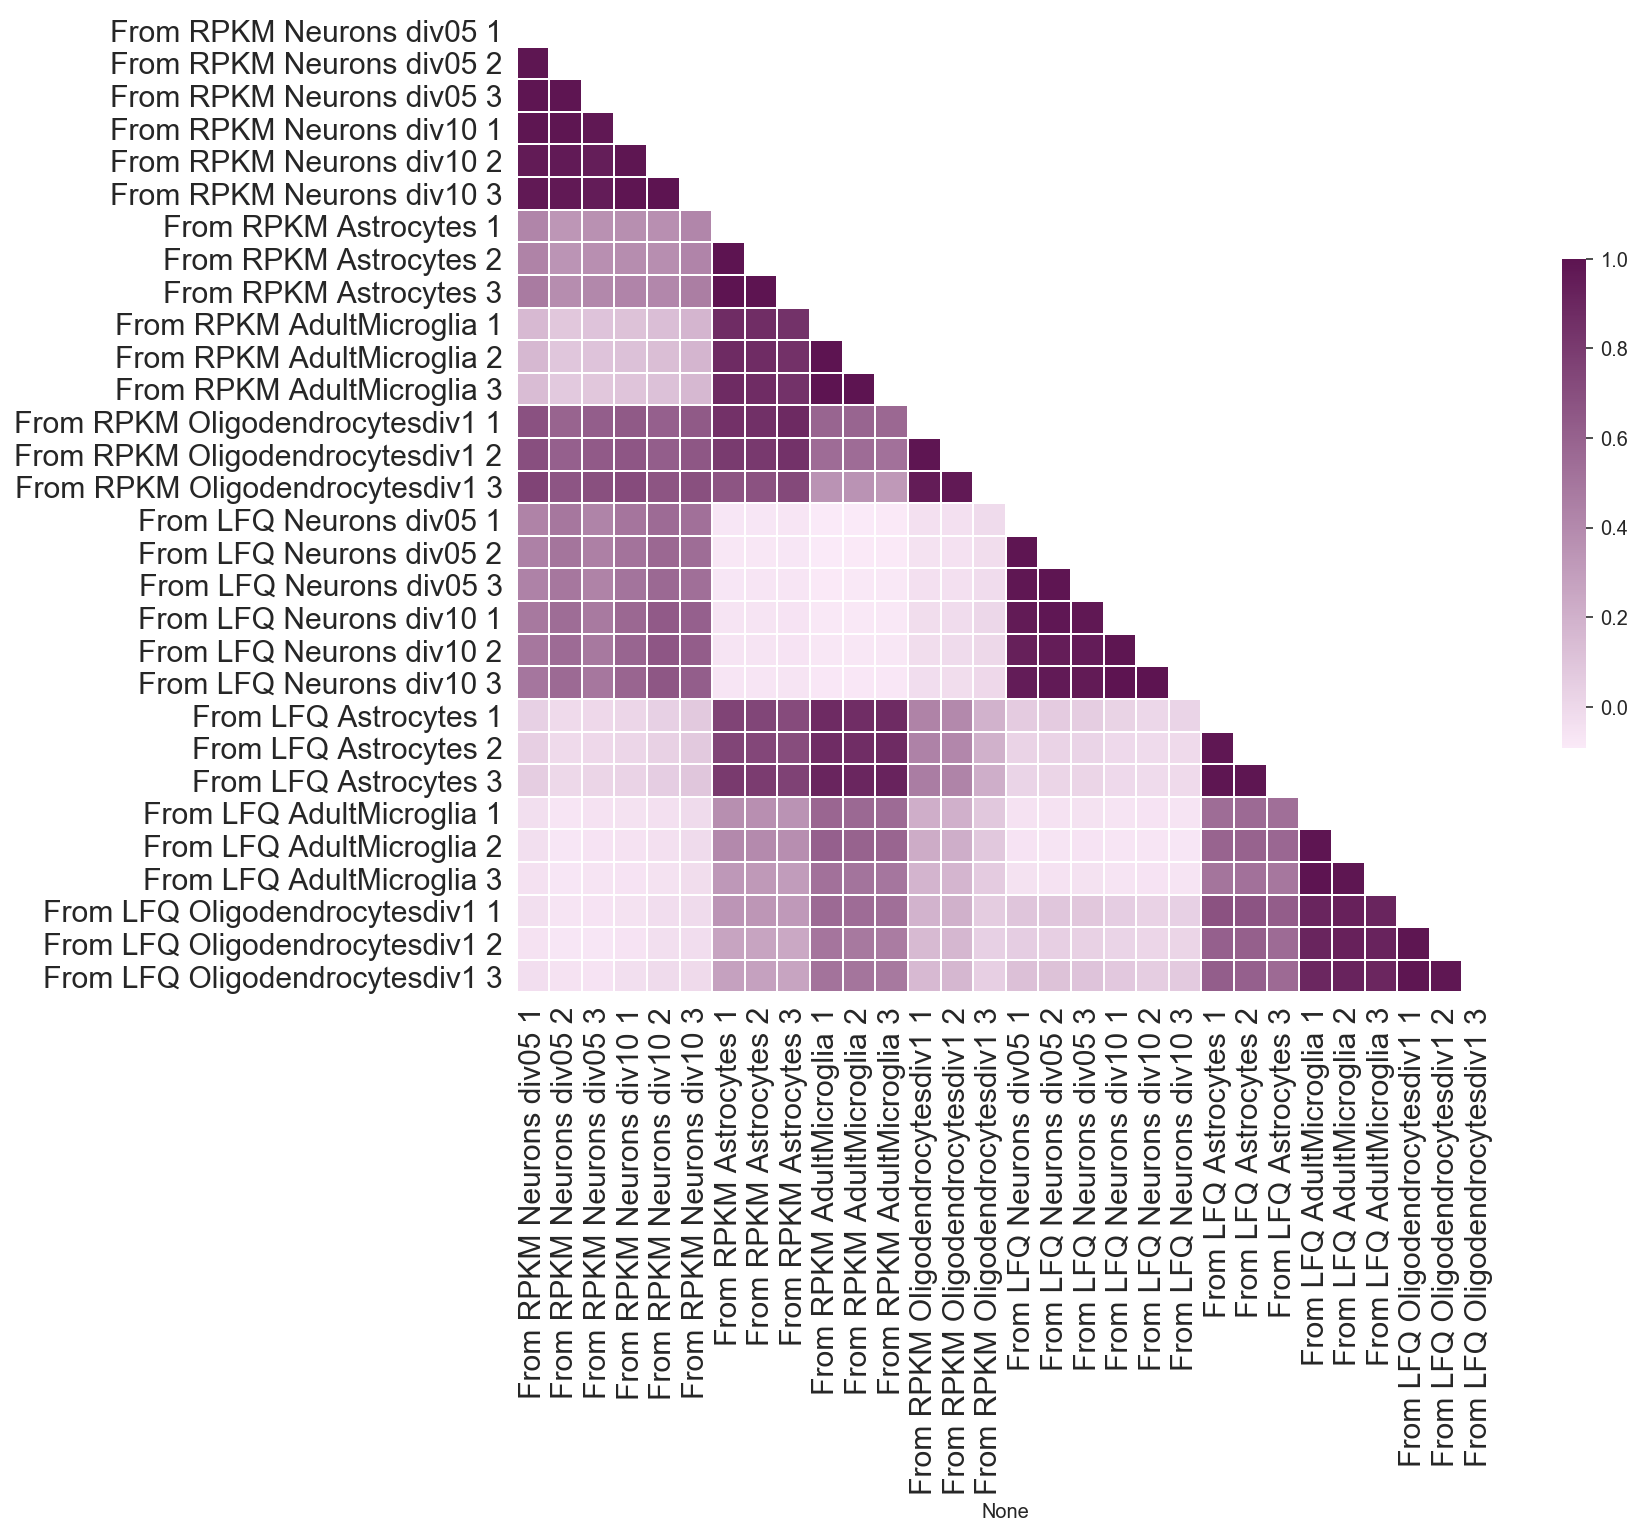

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(df, mask=mask, cmap=cmap, 
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})



# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.light_palette("grape purple", input="xkcd",as_cmap=True)


h = sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




h.tick_params(labelsize=15)
#f.set_ylabel("Y Label",fontsize=20)

#f.savefig("figS6A.svg", bbox_inches='tight')

In [14]:
sharmaRTP = sharmaRTP.rename(columns = {'LFQ intensity adult Microglia 1':'LFQ intensity AdultMicroglia 1',
       'LFQ intensity adult Microglia 2':'LFQ intensity AdultMicroglia 2', 'LFQ intensity adult Microglia 3':'LFQ intensity AdultMicroglia 3',
                                        
                                        'LFQ intensity Neurons div05                  1':'LFQ intensity Neurons div05 1','LFQ intensity Neurons div05                  2':'LFQ intensity Neurons div05 2',
                                        'LFQ intensity Neurons div05                  3':'LFQ intensity Neurons div05 3',
    'LFQ intensity Neurons div10                  1':'LFQ intensity Neurons div10 1','LFQ intensity Neurons div10                  2':'LFQ intensity Neurons div10 2',
                                        'LFQ intensity Neurons div10                  3':'LFQ intensity Neurons div10 3',
    'LFQ intensity Oligodendrocytes div1                    1':'LFQ intensity Oligodendrocytes div1 1','LFQ intensity Oligodendrocytes div1                    2':'LFQ intensity Oligodendrocytes div1 2',
                                        'LFQ intensity Oligodendrocytes div1                    3':'LFQ intensity Oligodendrocytes div1 3',
    'RPKM          cortical neurons div05                  1':'RPKM Neurons div05 1','RPKM          cortical neurons div05                  2':'RPKM Neurons div05 2',
                                        'RPKM          cortical neurons div05                  3':'RPKM cortical Neurons div05 3',
    'RPKM          cortical neurons div10                  1':'RPKM Neurons div10 1','RPKM          cortical neurons div10                  2':'RPKM Neurons div10 2',
                                        'RPKM          cortical neurons div10                  3':'RPKM Neurons div10 3',
    'RPKM          Astrocytes 1':'RPKM Astrocytes 1','RPKM          Astrocytes 2':'RPKM Astrocytes 2','RPKM          Astrocytes 3':'RPKM Astrocytes 3',
    'RPKM          adult microglia 1':'RPKM AdultMicroglia 1','RPKM          adult microglia 2':'RPKM AdultMicroglia 2','RPKM          adult microglia 3':'RPKM AdultMicroglia 3',
    'RPKM          Oligodendrocytes div1                  1':'RPKM Oligodendrocytes div1 1','RPKM          Oligodendrocytes div1                    2':'RPKM Oligodendrocytes div1 2',
                                        'RPKM          Oligodendrocytes div1                    3':'RPKM Oligodendrocytes div1 3'})



sharmaRTP = sharmaRTP.rename(columns = {'RPKM adult microglia 1':'RPKM AdultMicroglia 1', 'RPKM adult microglia 2':'RPKM AdultMicroglia 2',
       'RPKM adult microglia 3':'RPKM AdultMicroglia 3', 'RPKM cortical neurons div05 1':'RPKM Neurons div05 1',
       'RPKM cortical neurons div05 2':'RPKM Neurons div05 2', 'RPKM cortical Neurons div05 3':'RPKM Neurons div05 3',
       'RPKM cortical neurons div10 1':'RPKM Neurons div10 1', 'RPKM cortical neurons div10 2':'RPKM Neurons div10 2',
       'RPKM cortical neurons div10 3':'RPKM Neurons div10 3'})




In [15]:
corr2 = sharmaRTP[['RPKM Neurons div05 1','RPKM Neurons div05 2','RPKM Neurons div05 3',
    'RPKM Neurons div10 1','RPKM Neurons div10 2','RPKM Neurons div10 3',
    'RPKM Astrocytes 1','RPKM Astrocytes 2','RPKM Astrocytes 3',
    'RPKM AdultMicroglia 1','RPKM AdultMicroglia 2','RPKM AdultMicroglia 3',
    'RPKM Oligodendrocytes div1 1','RPKM Oligodendrocytes div1 2','RPKM Oligodendrocytes div1 3',
                   
       'LFQ intensity Neurons div05 1','LFQ intensity Neurons div05 2','LFQ intensity Neurons div05 3',
    'LFQ intensity Neurons div10 1','LFQ intensity Neurons div10 2','LFQ intensity Neurons div10 3',
    'LFQ intensity Astrocytes 1','LFQ intensity Astrocytes 2','LFQ intensity Astrocytes 3',
    'LFQ intensity AdultMicroglia 1','LFQ intensity AdultMicroglia 2','LFQ intensity AdultMicroglia 3',
    'LFQ intensity Oligodendrocytes div1 1','LFQ intensity Oligodendrocytes div1 2','LFQ intensity Oligodendrocytes div1 3'
]].corr(method='pearson')
corr2.style.background_gradient(cmap='Purples').set_precision(2).set_properties(**{'max-width': '5px', 'font-size': '8pt'})


In [16]:
corr2 = corr2.set_index([['RPKM Neurons div05 1','RPKM Neurons div05 2','RPKM Neurons div05 3',
    'RPKM Neurons div10 1','RPKM Neurons div10 2','RPKM Neurons div10 3',
    'RPKM Astrocytes 1','RPKM Astrocytes 2','RPKM Astrocytes 3',
    'RPKM AdultMicroglia 1','RPKM AdultMicroglia 2','RPKM AdultMicroglia 3',
    'RPKM Oligodendrocytes div1 1','RPKM Oligodendrocytes div1 2','RPKM Oligodendrocytes div1 3',
    
       'LFQ intensity Neurons div05 1','LFQ intensity Neurons div05 2','LFQ intensity Neurons div05 3',
    'LFQ intensity Neurons div10 1','LFQ intensity Neurons div10 2','LFQ intensity Neurons div10 3',
    'LFQ intensity Astrocytes 1','LFQ intensity Astrocytes 2','LFQ intensity Astrocytes 3',
    'LFQ intensity AdultMicroglia 1','LFQ intensity AdultMicroglia 2','LFQ intensity AdultMicroglia 3',
    'LFQ intensity Oligodendrocytes div1 1','LFQ intensity Oligodendrocytes div1 2','LFQ intensity Oligodendrocytes div1 3']])






In [17]:
corr3 = pd.DataFrame(corr.values - corr2.values)

In [18]:
corr3 = corr3.set_index([['From RPKM Neurons div05 1', 'From RPKM Neurons div05 2',
       'From RPKM Neurons div05 3', 'From RPKM Neurons div10 1',
       'From RPKM Neurons div10 2', 'From RPKM Neurons div10 3',
       'From RPKM Astrocytes 1', 'From RPKM Astrocytes 2',
       'From RPKM Astrocytes 3', 'From RPKM AdultMicroglia 1',
       'From RPKM AdultMicroglia 2', 'From RPKM AdultMicroglia 3',
       'From RPKM Oligodendrocytesdiv1 1', 'From RPKM Oligodendrocytesdiv1 2',
       'From RPKM Oligodendrocytesdiv1 3', 'From LFQ Neurons div05 1',
       'From LFQ Neurons div05 2', 'From LFQ Neurons div05 3',
       'From LFQ Neurons div10 1', 'From LFQ Neurons div10 2',
       'From LFQ Neurons div10 3', 'From LFQ Astrocytes 1',
       'From LFQ Astrocytes 2', 'From LFQ Astrocytes 3',
       'From LFQ AdultMicroglia 1', 'From LFQ AdultMicroglia 2',
       'From LFQ AdultMicroglia 3', 'From LFQ Oligodendrocytesdiv1 1',
       'From LFQ Oligodendrocytesdiv1 2', 'From LFQ Oligodendrocytesdiv1 3']])

In [19]:
corr3.columns = ['From RPKM Neurons div05 1', 'From RPKM Neurons div05 2',
       'From RPKM Neurons div05 3', 'From RPKM Neurons div10 1',
       'From RPKM Neurons div10 2', 'From RPKM Neurons div10 3',
       'From RPKM Astrocytes 1', 'From RPKM Astrocytes 2',
       'From RPKM Astrocytes 3', 'From RPKM AdultMicroglia 1',
       'From RPKM AdultMicroglia 2', 'From RPKM AdultMicroglia 3',
       'From RPKM Oligodendrocytesdiv1 1', 'From RPKM Oligodendrocytesdiv1 2',
       'From RPKM Oligodendrocytesdiv1 3', 'From LFQ Neurons div05 1',
       'From LFQ Neurons div05 2', 'From LFQ Neurons div05 3',
       'From LFQ Neurons div10 1', 'From LFQ Neurons div10 2',
       'From LFQ Neurons div10 3', 'From LFQ Astrocytes 1',
       'From LFQ Astrocytes 2', 'From LFQ Astrocytes 3',
       'From LFQ AdultMicroglia 1', 'From LFQ AdultMicroglia 2',
       'From LFQ AdultMicroglia 3', 'From LFQ Oligodendrocytesdiv1 1',
       'From LFQ Oligodendrocytesdiv1 2', 'From LFQ Oligodendrocytesdiv1 3']

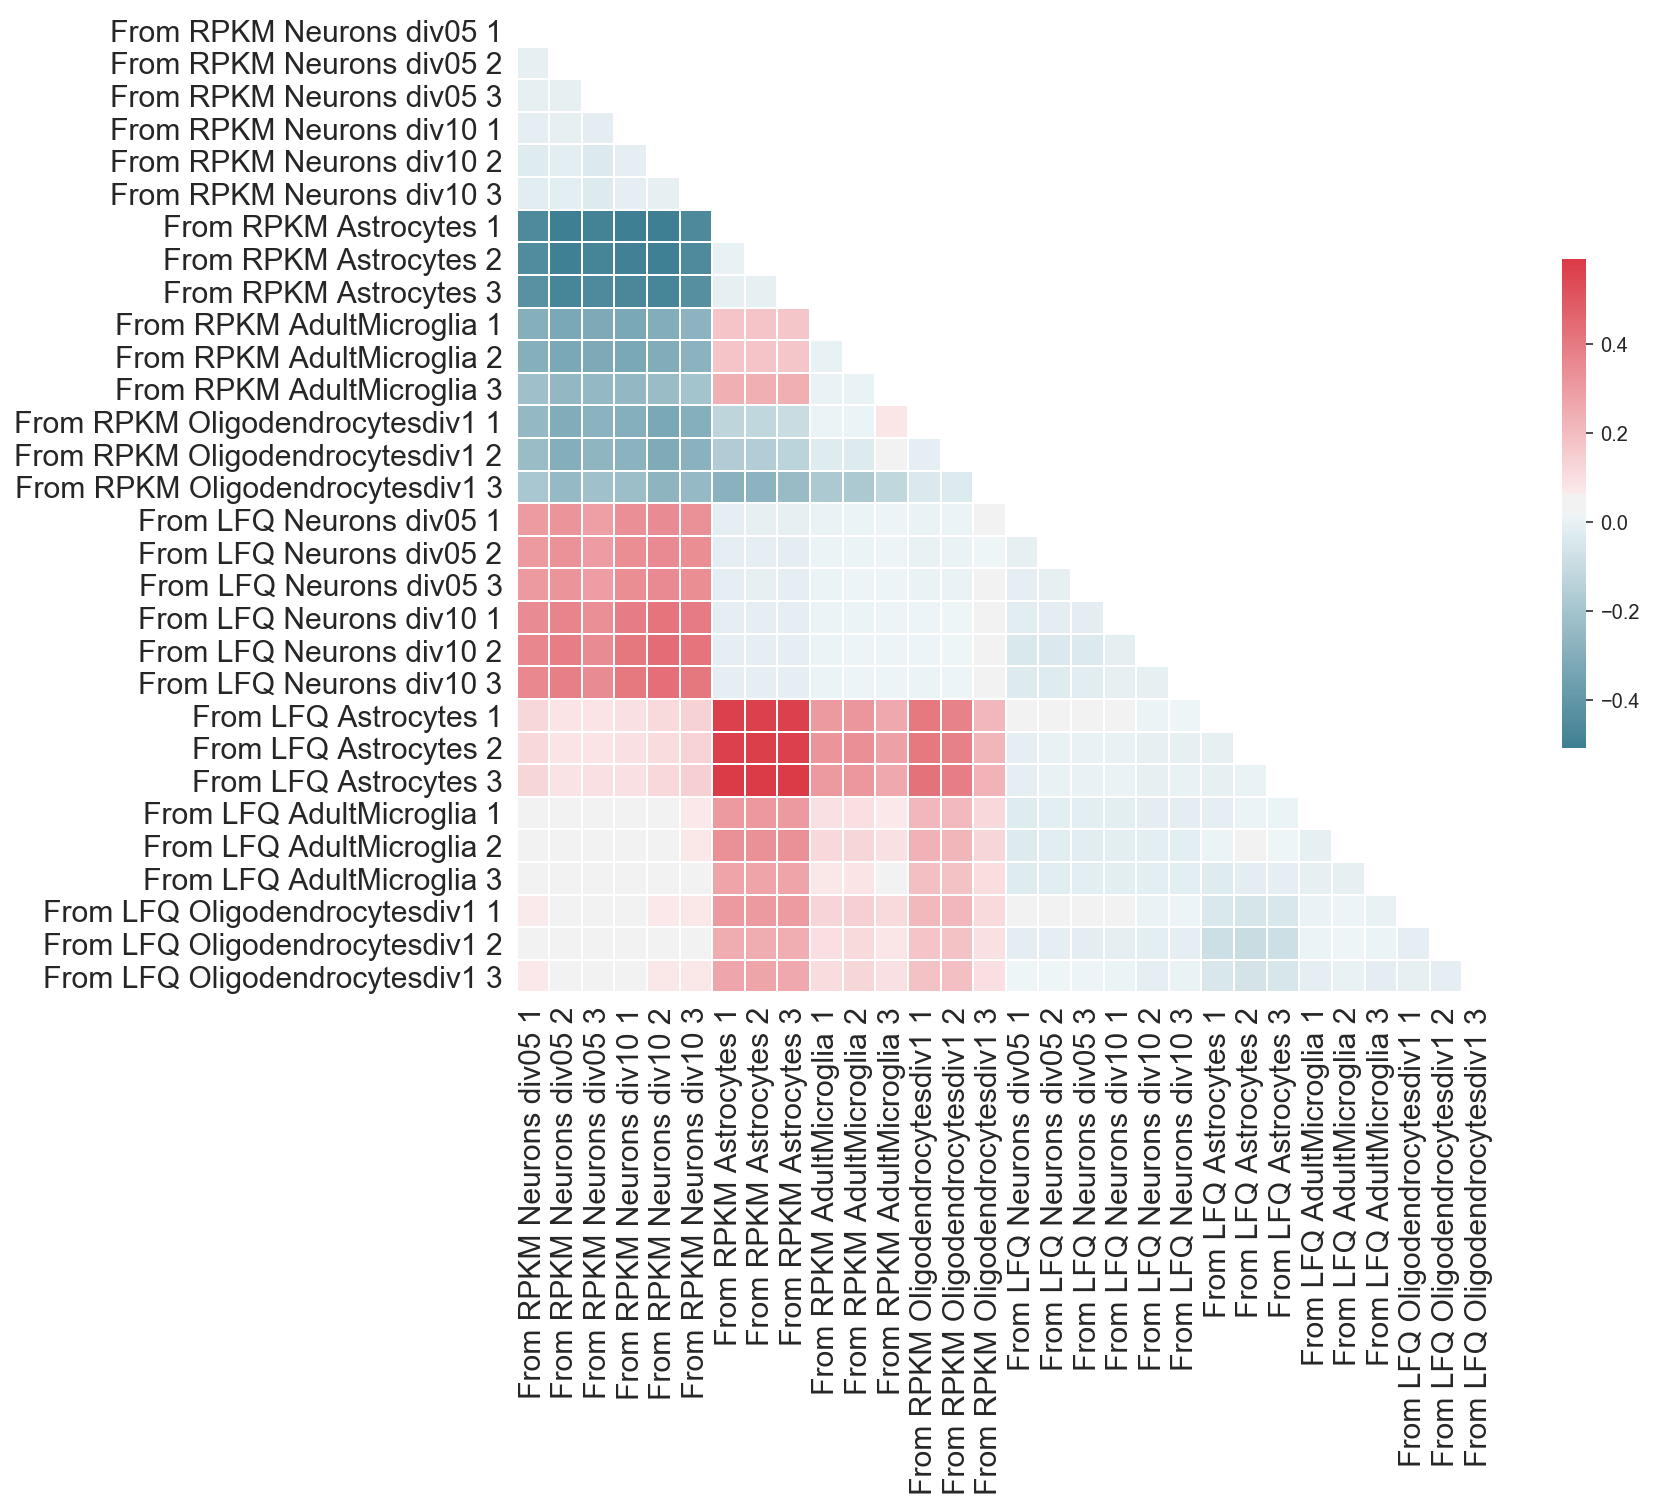

In [20]:
# corr3 = pd.DataFrame(corr.values - corr2.values) i.e difference between pearson corr (pearson corr concentrations - pearson corr raw data)


#import matplotlib.pyplot as plt
#import seaborn as sns


f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(df, mask=mask, cmap=cmap, 
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})



# Generate a mask for the upper triangle
mask = np.zeros_like(corr3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

h = sns.heatmap(corr3, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

h.tick_params(labelsize=15)
#f.set_ylabel("Y Label",fontsize=20)

#f.savefig("figS6B.svg", bbox_inches='tight')